<a href="https://colab.research.google.com/github/Upasanadhameliya/Python-Machine-Learning-Notebooks/blob/master/Keras_Project_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data_info = pd.read_csv('/content/drive/My Drive/data/lending_club_info.csv',index_col='LoanStatNew')

In [ ]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [ ]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [ ]:
feat_info('mort_acc')

Number of mortgage accounts.


In [ ]:
df = pd.read_csv('/content/drive/My Drive/data/lending_club_loan_two.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [ ]:
df['emp_title'].unique().size

173106

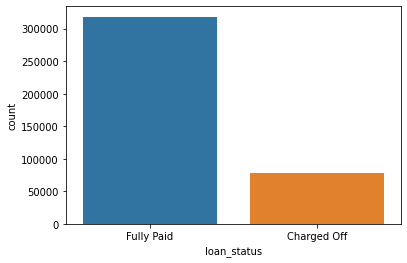

In [ ]:
sns.countplot(x='loan_status',data=df)

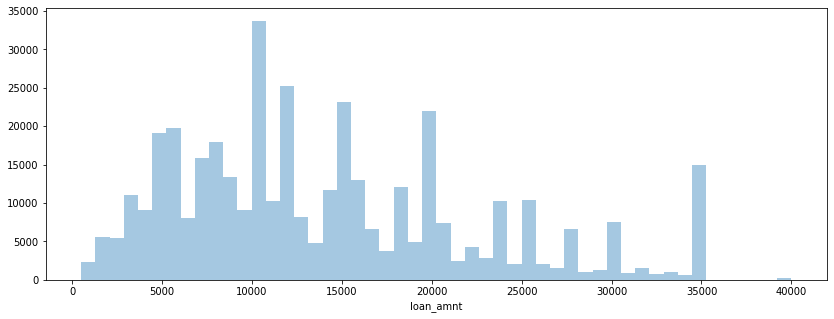

In [ ]:
plt.figure(figsize=(14,5))
sns.distplot(df['loan_amnt'],kde=False)

In [ ]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


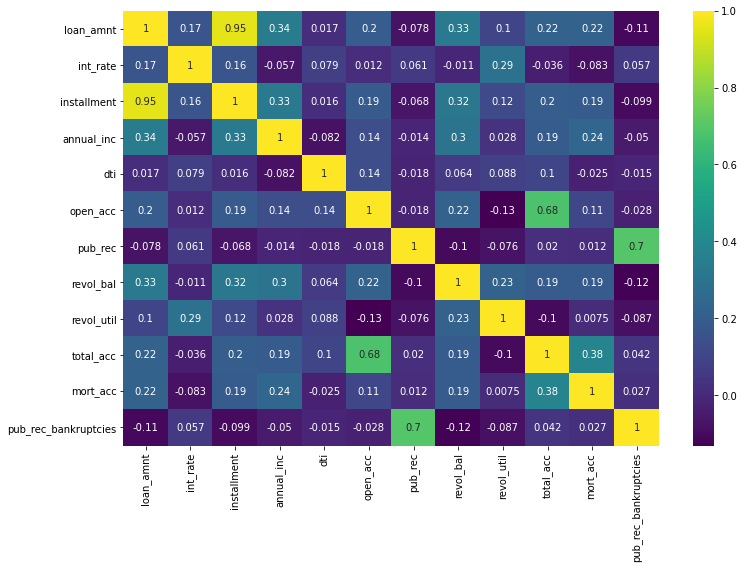

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

In [ ]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


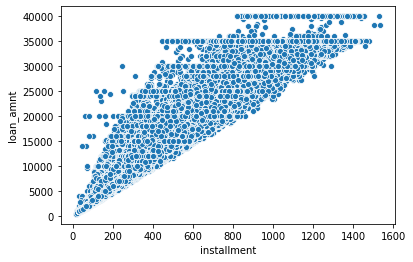

In [ ]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

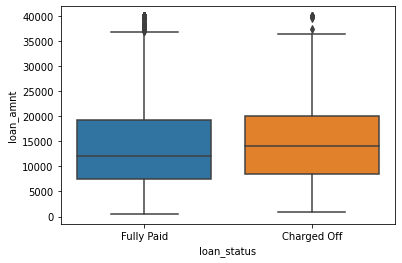

In [ ]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [ ]:
df.groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [ ]:
print(df['grade'].unique())

['B' 'A' 'C' 'E' 'D' 'F' 'G']


In [ ]:
print(df['sub_grade'].unique())

['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


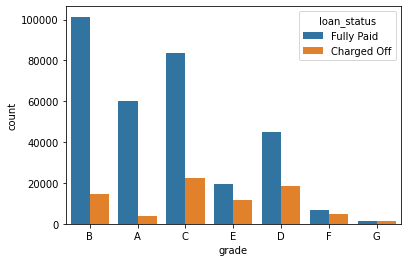

In [ ]:
sns.countplot(x='grade',data=df,hue='loan_status')

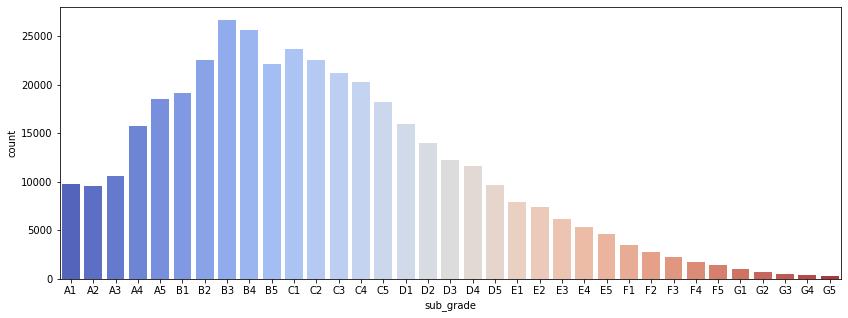

In [ ]:
plt.figure(figsize=(14,5))
sns.countplot(x='sub_grade',data=df.sort_values('sub_grade'),palette='coolwarm')

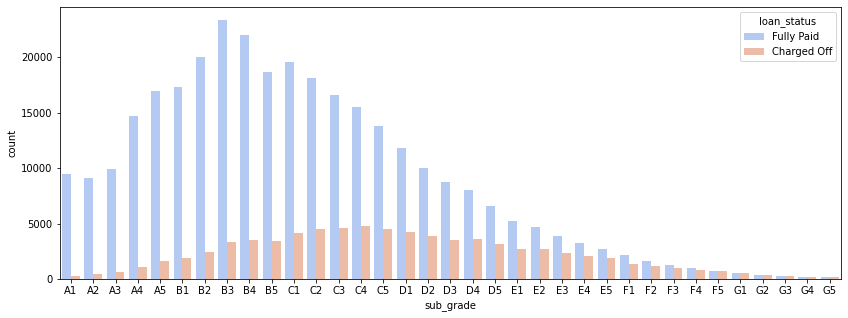

In [ ]:
plt.figure(figsize=(14,5))
sns.countplot(x='sub_grade',data=df.sort_values('sub_grade'),palette='coolwarm',hue='loan_status')

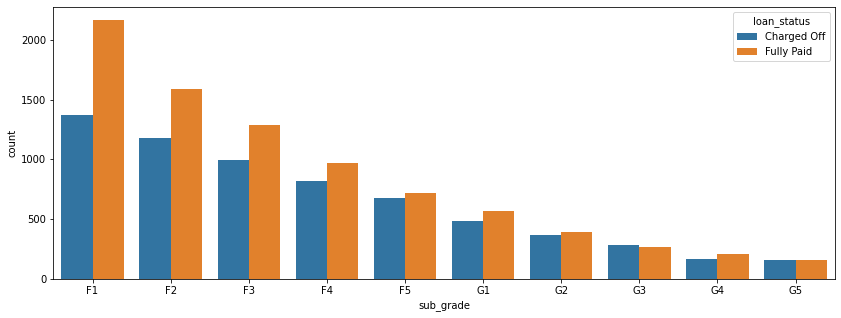

In [ ]:
plt.figure(figsize=(14,5))
sns.countplot(x='sub_grade',data=df[df['grade'].isin(['F','G'])].sort_values('sub_grade'),hue='loan_status')

In [ ]:
df['loan_repaid']=df['loan_status'].apply(lambda x:1 if x=='Fully Paid' else 0)

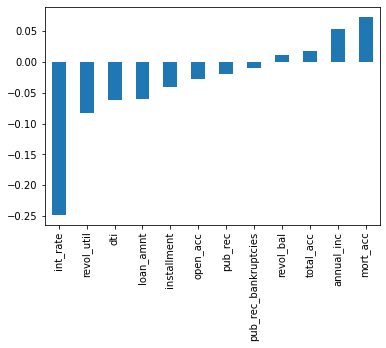

In [ ]:
df.corr()['loan_repaid'].sort_values()[:-1].plot(kind='bar')

In [ ]:
df.idxmax

<bound method DataFrame.idxmax of         loan_amnt  ... loan_repaid
0         10000.0  ...           1
1          8000.0  ...           1
2         15600.0  ...           1
3          7200.0  ...           1
4         24375.0  ...           0
...           ...  ...         ...
396025    10000.0  ...           1
396026    21000.0  ...           1
396027     5000.0  ...           1
396028    21000.0  ...           1
396029     2000.0  ...           1

[396030 rows x 28 columns]>

In [ ]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [ ]:
(df.isna().sum() / len(df)) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [ ]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [ ]:
feat_info('emp_title')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [ ]:
df['emp_title'].nunique()

173105

In [ ]:
df['emp_title'].value_counts()

Teacher                         4389
Manager                         4250
Registered Nurse                1856
RN                              1846
Supervisor                      1830
                                ... 
B2B Sales Consultant               1
Marine Corps Systems Command       1
Lease Security supervisor          1
Retail Technology Experts          1
AP Analyst                         1
Name: emp_title, Length: 173105, dtype: int64

In [ ]:
df.drop('emp_title',axis=1,inplace=True)

In [ ]:
df['emp_length'].sort_values().unique()

array(['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '< 1 year', nan],
      dtype=object)

In [ ]:
def year_num(var):
  val = var.split()[0]
  if val == '<':
    return 0
  elif len(val) > 1:
    return 10
  else:
    return int(val)

In [ ]:
df['emp_length_int']=df['emp_length'].dropna().apply(year_num)

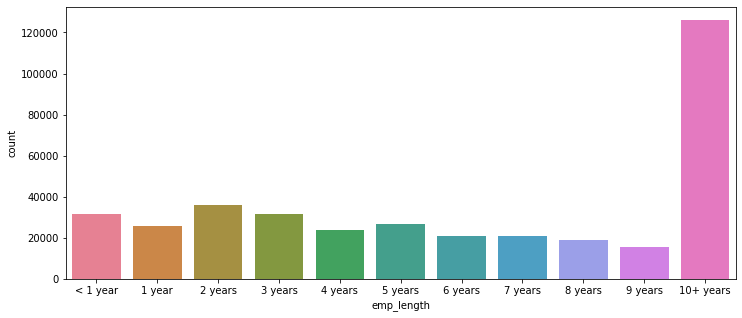

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='emp_length',data=df.sort_values('emp_length_int'),palette='husl')

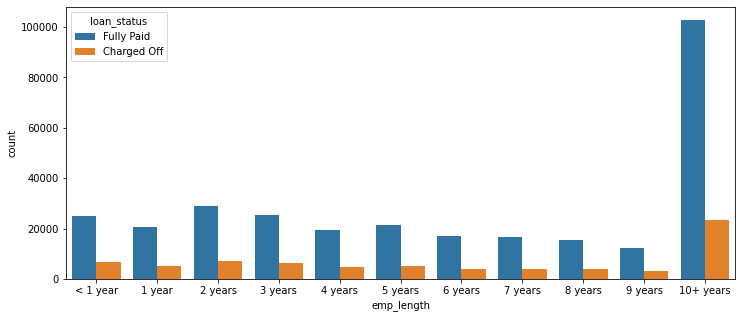

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='emp_length',data=df.sort_values('emp_length_int'),hue='loan_status')

In [ ]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

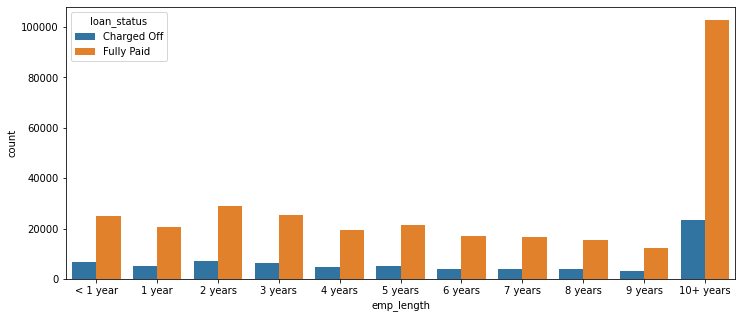

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='emp_length',data=df,hue='loan_status',order = ['< 1 year',
  '1 year','2 years', '3 years', '4 years', '5 years', '6 years', '7 years'
  , '8 years', '9 years', '10+ years'],hue_order=['Charged Off','Fully Paid'])

In [ ]:
df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [ ]:
df.groupby('emp_length').count()['loan_status']

emp_length
1 year        25882
10+ years    126041
2 years       35827
3 years       31665
4 years       23952
5 years       26495
6 years       20841
7 years       20819
8 years       19168
9 years       15314
< 1 year      31725
Name: loan_status, dtype: int64

In [ ]:
df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status'] / df.groupby('emp_length').count()['loan_status'] 

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

In [ ]:
chdf = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status'] / df.groupby('emp_length').count()['loan_status'] 

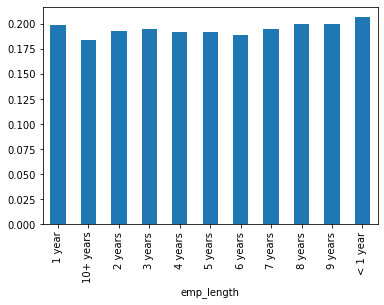

In [ ]:
chdf.plot(kind='bar')

In [ ]:
df.drop(labels=['emp_length','emp_length_int'],axis=1,inplace=True)

In [ ]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [ ]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [ ]:
df['title'].head()

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
Name: title, dtype: object

In [ ]:
df.drop('title',axis=1,inplace=True)

In [ ]:
feat_info('mort_acc')

Number of mortgage accounts.


In [ ]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [ ]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [ ]:
df.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [ ]:
total_acc_ser = df.groupby('total_acc').mean()['mort_acc']

In [ ]:
df[df['mort_acc'].isna()]['total_acc'].apply(lambda x:x)

22         7.0
25        10.0
32        18.0
41        16.0
62        17.0
          ... 
395991    21.0
395995    20.0
396016    23.0
396021    50.0
396029    19.0
Name: total_acc, Length: 37795, dtype: float64

In [ ]:
df[df['mort_acc'].isna()]['total_acc'].apply(lambda x:total_acc_ser[x])

22        0.221695
25        0.429158
32        1.235885
41        1.007405
62        1.151269
            ...   
395991    1.519932
395995    1.409380
396016    1.721794
396021    3.220866
396029    1.358013
Name: total_acc, Length: 37795, dtype: float64

In [ ]:
df[df['mort_acc'].isna()]['mort_acc']

22       NaN
25       NaN
32       NaN
41       NaN
62       NaN
          ..
395991   NaN
395995   NaN
396016   NaN
396021   NaN
396029   NaN
Name: mort_acc, Length: 37795, dtype: float64

In [ ]:
df['mort_acc'].fillna(df[df['mort_acc'].isna()]['total_acc'].apply(lambda x:total_acc_ser[x]),inplace=True)

In [ ]:
df.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [ ]:
df.select_dtypes(include='object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [ ]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [ ]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
df['term']

0          36 months
1          36 months
2          36 months
3          36 months
4          60 months
             ...    
396025     60 months
396026     36 months
396027     36 months
396028     60 months
396029     36 months
Name: term, Length: 395219, dtype: object

In [ ]:
df['term'] = df['term'].map({' 36 months':36,' 60 months':60})

In [ ]:
df.drop('grade',axis=1,inplace=True)

In [ ]:
df = pd.concat([df,pd.get_dummies(df['sub_grade'],drop_first=True)],axis=1)

In [ ]:
df.drop('sub_grade',axis=1,inplace=True)

In [ ]:
df['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [ ]:
df = pd.concat(objs=[df,pd.get_dummies(df['verification_status'],drop_first=True)],axis=1)

In [ ]:
df.drop('verification_status',axis=1,inplace=True)

In [ ]:
df['application_type'].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [ ]:
df = pd.concat(objs=[df,pd.get_dummies(df['application_type'],drop_first=True)],axis=1)

In [ ]:
df.drop('application_type',axis=1,inplace=True)

In [ ]:
df['initial_list_status'].value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

In [ ]:
df = pd.concat(objs=[df,pd.get_dummies(df['initial_list_status'],drop_first=True)],axis=1)

In [ ]:
df.drop('initial_list_status',axis=1,inplace=True)

In [ ]:
df['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

In [ ]:
df = pd.concat(objs=[df,pd.get_dummies(df['purpose'],drop_first=True)],axis=1)

In [ ]:
df.drop('purpose',axis=1,inplace=True)

In [ ]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [ ]:
df['home_ownership']=df['home_ownership'].apply(lambda x:'OTHER' if x=='NONE' or x=='ANY' else x)

In [ ]:
df = pd.concat(objs=[df,pd.get_dummies(df['home_ownership'],drop_first=True)],axis=1)

In [ ]:
df.drop('home_ownership',axis=1,inplace=True)

In [ ]:
df['zip_code'] = df['address'].apply(lambda x:x[-5:])

In [ ]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [ ]:
df = pd.concat([df,pd.get_dummies(df['zip_code'],drop_first=True)],axis=1)

In [ ]:
df.drop(labels=['address','zip_code'],axis=1,inplace=True)

In [ ]:
df.drop(labels='issue_d',axis=1,inplace=True)

In [ ]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x:int(x[-4:]))

In [ ]:
df.drop(labels='earliest_cr_line',axis=1,inplace=True)

In [ ]:
df.drop(labels='loan_status',axis=1,inplace=True)

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,Source Verified,Verified,INDIVIDUAL,JOINT,w,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,OTHER,OWN,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1999


In [ ]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=101)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential()

In [ ]:
X_train.shape

(316175, 78)

In [ ]:
model.add(Dense(units=78,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=39,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=19,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1,activation='sigmoid'))

In [ ]:
earlystop = EarlyStopping(monitor='val_loss',patience=25,verbose=1,mode='min')

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
model.fit(x=X_train,y=y_train,batch_size=128,epochs=800,verbose=1,callbacks=[earlystop],validation_data=(X_test,y_test))

Epoch 1/800
2471/2471 [==============================] - 5s 2ms/step - loss: 0.3166 - val_loss: 0.2663
Epoch 2/800
2471/2471 [==============================] - 5s 2ms/step - loss: 0.2714 - val_loss: 0.2653
Epoch 3/800
2471/2471 [==============================] - 5s 2ms/step - loss: 0.2678 - val_loss: 0.2638
Epoch 4/800
2471/2471 [==============================] - 5s 2ms/step - loss: 0.2669 - val_loss: 0.2640
Epoch 5/800
2471/2471 [==============================] - 5s 2ms/step - loss: 0.2660 - val_loss: 0.2637
Epoch 6/800
2471/2471 [==============================] - 5s 2ms/step - loss: 0.2656 - val_loss: 0.2646
Epoch 7/800
2471/2471 [==============================] - 5s 2ms/step - loss: 0.2654 - val_loss: 0.2635
Epoch 8/800
2471/2471 [==============================] - 5s 2ms/step - loss: 0.2652 - val_loss: 0.2636
Epoch 9/800
2471/2471 [==============================] - 5s 2ms/step - loss: 0.2653 - val_loss: 0.2628
Epoch 10/800
2471/2471 [==============================] - 5s 2ms/step - l

In [ ]:
# model.save('keras_classifier.h5')

In [ ]:
# model = load_model('keras_classifier.h5')

In [ ]:
histdf = pd.DataFrame(model.history.history)

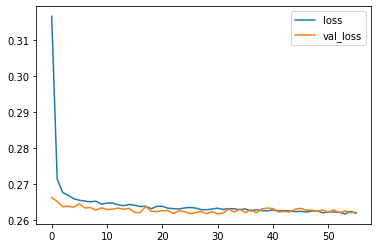

In [ ]:
histdf.plot()

In [ ]:
pred = model.predict(X_test)

In [ ]:
# print(classification_report(y_test,pred))
display((pred > 0.5).astype(int)[:30])

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0]])

In [ ]:
print(classification_report(y_test,(pred > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [ ]:
print(confusion_matrix(y_test,(pred > 0.5).astype(int)))

[[ 6721  8937]
 [    9 63377]]


In [ ]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [ ]:
newcustX = scaler.transform(new_customer.values.reshape(1,-1))

In [ ]:
newcustpred = model.predict(newcustX)

In [ ]:
(newcustpred > 0.5).astype(int)

array([[1]])

In [ ]:
df['loan_repaid'].iloc[random_ind]

1